<a href="https://colab.research.google.com/github/Amaka29/hamoye_quiz_1/blob/main/Africa_Food_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Nourishing Nations: A Decade of African Food Production and Supply Analysis**

In [ ]:
#Import Libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
!pip install geopandas folium
import folium
from scipy.stats import pearsonr

In [ ]:
#Import Food Production Data
il = ["https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Production%20(2004%20-%202013).csv", "Data"]



In [ ]:
# Extracting the URL and the DataFrame name
url, df_name = il

# Reading the CSV file into a DataFrame
food_prod = pd.read_csv(url)

# Displaying the Dataset
food_prod

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [ ]:
#Import Food Supply Data
im = ["https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Supply%20(2004%20-%202013).csv", "Data"]

In [ ]:
# Extracting the URL and the DataFrame name
url, df_name = im

# Reading the CSV file into a DataFrame
food_supply = pd.read_csv(url)

# Displaying the Dataset
food_supply


,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


# **Data Cleaning**

In [ ]:
# Check for missing values in food_prod
missing_values_food_prod = food_prod.isnull().sum()
print("Missing Values in food_prod:\n", missing_values_food_prod)


Missing Values in food_prod:
 Country    0
Item       0
Year       0
Value      0
dtype: int64


In [ ]:
# Check for duplicates in food_prod
duplicates_food_prod = food_prod.duplicated().sum()
print("\nNumber of Duplicates in food_prod:", duplicates_food_prod)


Number of Duplicates in food_prod: 0


In [ ]:
# Checking data types in food_prod
print(food_prod.dtypes)

Country    object
Item       object
Year        int64
Value       int64
dtype: object


In [ ]:
# Convert 'year' to datetime format
food_prod['Year'] = pd.to_datetime(food_prod['Year'], format='%Y')
print(food_prod.dtypes)

Country            object
Item               object
Year       datetime64[ns]
Value               int64
dtype: object


In [ ]:
# Extract year from the 'year' column
food_prod['Year'] = food_prod['Year'].dt.year

# Print the DataFrame to check the changes
print(food_prod)

        Country                Item  Year  Value
0       Algeria  Wheat and products  2004   2731
1       Algeria  Wheat and products  2005   2415
2       Algeria  Wheat and products  2006   2688
3       Algeria  Wheat and products  2007   2319
4       Algeria  Wheat and products  2008   1111
...         ...                 ...   ...    ...
23105  Zimbabwe         Crustaceans  2009      0
23106  Zimbabwe         Crustaceans  2010      0
23107  Zimbabwe         Crustaceans  2011      0
23108  Zimbabwe         Crustaceans  2012      0
23109  Zimbabwe         Crustaceans  2013      0

[23110 rows x 4 columns]


In [ ]:
# Check for missing values in food_supply
missing_values_food_supply = food_supply.isnull().sum()
print("\nMissing Values in food_supply:\n", missing_values_food_supply)


Missing Values in food_supply:
 Country    0
Year       0
Value      0
dtype: int64


In [ ]:
# Check for duplicates in food_supply
duplicates_food_supply = food_supply.duplicated().sum()
print("\nNumber of Duplicates in food_supply:", duplicates_food_supply)


Number of Duplicates in food_supply: 0


In [ ]:
# Checking data types in food_supply
print(food_supply.dtypes)

Country    object
Year        int64
Value       int64
dtype: object


In [ ]:
# Convert 'year' to datetime format
food_supply['Year'] = pd.to_datetime(food_supply['Year'], format='%Y')

print(food_supply.dtypes)

Country            object
Year       datetime64[ns]
Value               int64
dtype: object


In [ ]:
# Extract year from the 'year' column
food_supply['Year'] = food_supply['Year'].dt.year

# Print the DataFrame to check the changes
print(food_supply)

      Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]


# **Descriptive Analysis**

In [ ]:
# Summary statistics for food_prod
summary_stats_food_prod = food_prod.describe()
print("Summary Statistics for food_prod:\n", summary_stats_food_prod)


Summary Statistics for food_prod:
                Year         Value
count  23110.000000  23110.000000
mean    2008.498269    327.785201
std        2.871740   1607.940343
min     2004.000000      0.000000
25%     2006.000000      3.000000
50%     2008.000000     18.000000
75%     2011.000000    108.000000
max     2013.000000  54000.000000


In [ ]:
# Summary statistics for food_supply
summary_stats_food_supply = food_supply.describe()
print("\nSummary Statistics for food_supply:\n", summary_stats_food_supply)


Summary Statistics for food_supply:
               Year        Value
count   450.000000   450.000000
mean   2008.500000  2469.775556
std       2.875478   379.140143
min    2004.000000  1781.000000
25%    2006.000000  2174.000000
50%    2008.500000  2376.000000
75%    2011.000000  2681.750000
max    2013.000000  3561.000000


In [ ]:
# Unique values in food_prod
unique_values_food_prod = food_prod.nunique()
print("\nUnique Values in food_prod:\n", unique_values_food_prod)


Unique Values in food_prod:
 Country      45
Item         94
Year         10
Value      2134
dtype: int64


In [ ]:
# Unique values in food_supply
unique_values_food_supply = food_supply.nunique()
print("\nUnique Values in food_supply:\n", unique_values_food_supply)


Unique Values in food_supply:
 Country     45
Year        10
Value      373
dtype: int64


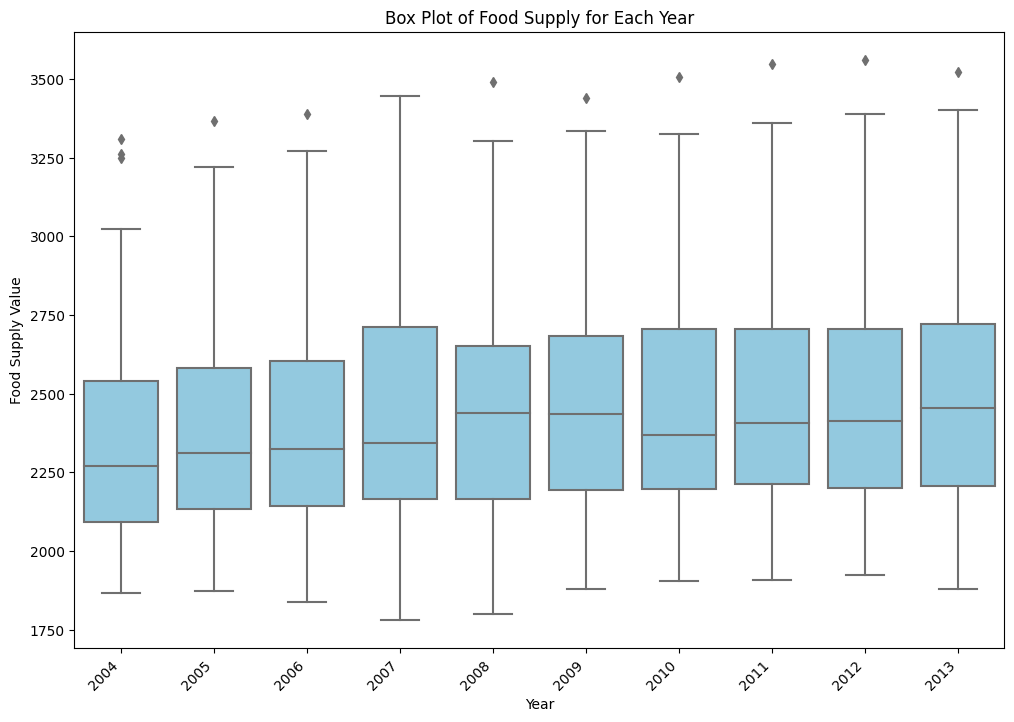

In [ ]:
# Box plot for food supply for each year

plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Value', data=food_supply, color = 'skyblue')
plt.title('Box Plot of Food Supply for Each Year')
plt.xlabel('Year')
plt.ylabel('Food Supply Value')
plt.xticks(rotation=45, ha='right')
plt.show()

**Finding Outliers in Food Supply for Each Year**

In [ ]:
# Calculate the IQR for each year
yearly_iqr = food_supply.groupby('Year')['Value'].quantile(0.75) - food_supply.groupby('Year')['Value'].quantile(0.25)

# Define a threshold for identifying outliers (e.g., 1.5 times the IQR)
outlier_threshold = 1.5

# Identify outliers for each year
outliers = food_supply.groupby('Year').apply(lambda x: (x['Value'] < (x['Value'].quantile(0.25) - outlier_threshold * yearly_iqr[x.name])) | (x['Value'] > (x['Value'].quantile(0.75) + outlier_threshold * yearly_iqr[x.name])))

# Flatten the boolean Series to align with the original DataFrame
outliers = outliers.reset_index(level=0, drop=True)

# Print the rows containing outliers
print(food_supply[outliers])

     Country  Year  Value
120    Egypt  2004   3309
121    Egypt  2005   3367
122    Egypt  2006   3389
124    Egypt  2008   3490
125    Egypt  2009   3441
126    Egypt  2010   3507
127    Egypt  2011   3549
128    Egypt  2012   3561
129    Egypt  2013   3522
270  Morocco  2004   3263
400  Tunisia  2004   3248


<ipython-input-27-3905ea9269c8>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(food_supply[outliers])


In [ ]:
# Correlation between 'value' in food_prod and 'Value' in food_supply
correlation_value = food_prod['Value'].corr(food_supply['Value'])
print("\nCorrelation between 'Value' in food_prod and 'Value' in food_supply:", correlation_value)


Correlation between 'Value' in food_prod and 'Value' in food_supply: 0.2798173865226399


# **Exploratory Data Analysis**

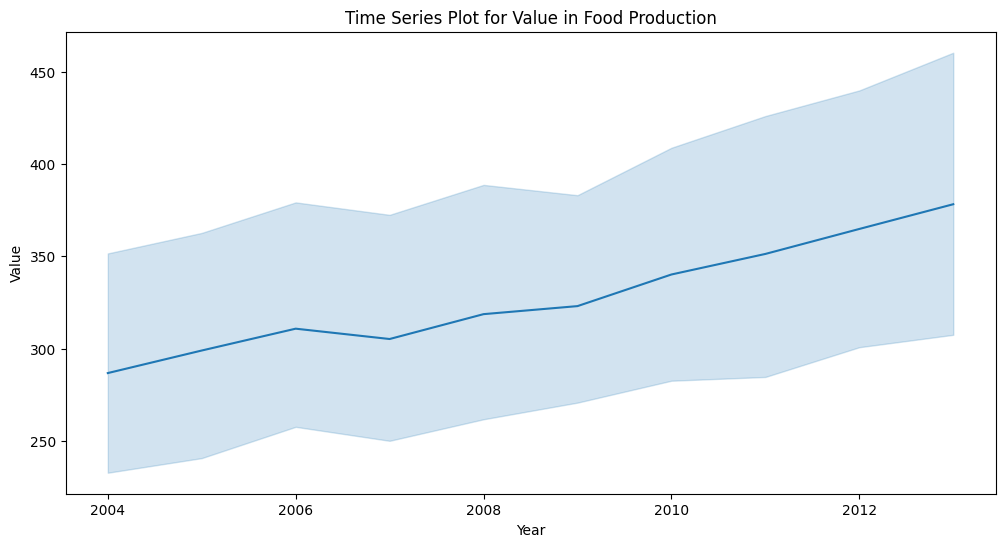

In [ ]:
# Line plot for 'Value' in food_prod over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', data=food_prod)
plt.title('Time Series Plot for Value in Food Production')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


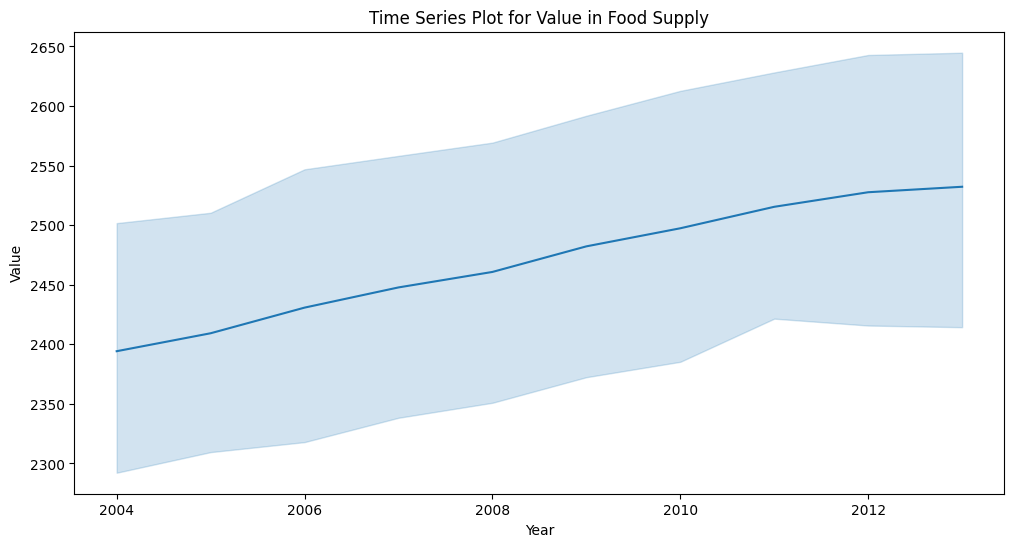

In [ ]:
# Line plot for 'Value' in food_supply over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', data=food_supply)
plt.title('Time Series Plot for Value in Food Supply')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

In [ ]:
# Group by 'country' and 'year', summing up the 'value' for each group
grouped_food_prod = food_prod.groupby(['Country', 'Year'])['Value'].sum().reset_index()

# Rename the column to 'total_value'
grouped_food_prod.rename(columns={'Value': 'Total_value'}, inplace=True)

# Display the new dataset
grouped_food_prod

,Country,Year,Total_value
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841
...,...,...,...
445,Zimbabwe,2009,5754
446,Zimbabwe,2010,6777
447,Zimbabwe,2011,7551
448,Zimbabwe,2012,8173


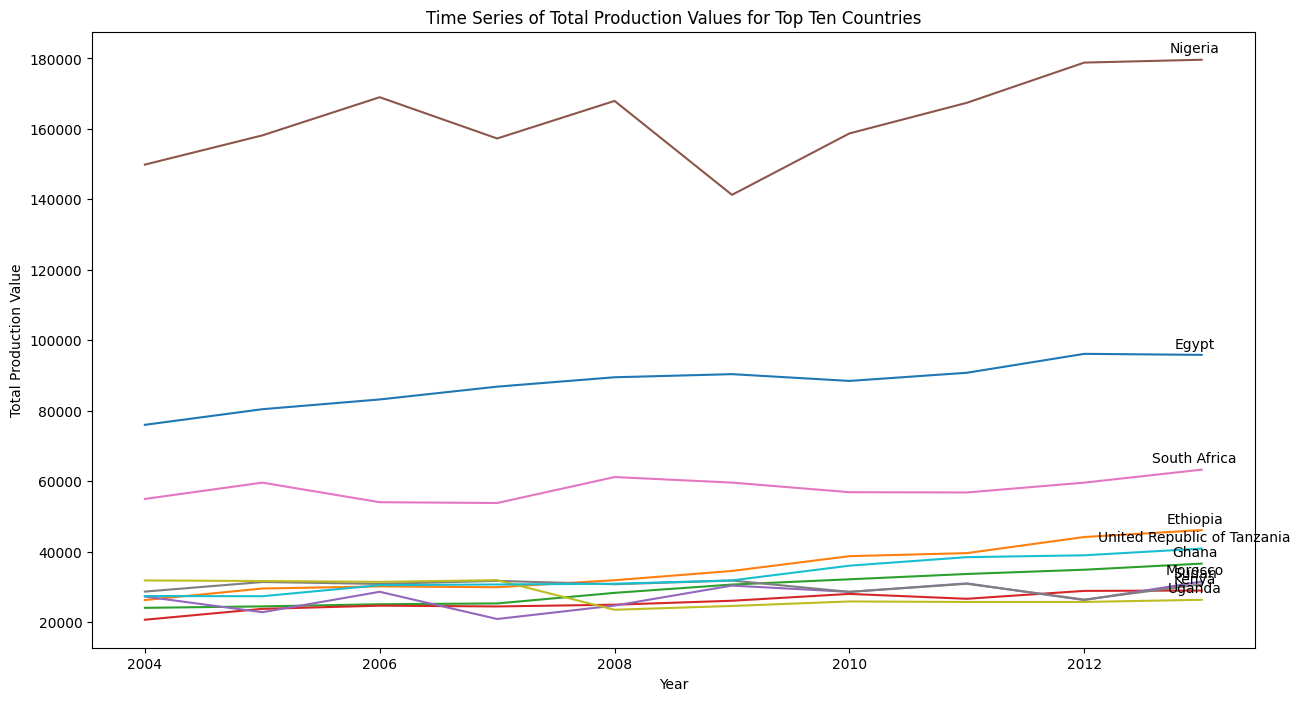

In [ ]:
# Select the top ten countries based on total production values
top_countries = grouped_food_prod.groupby('Country')['Total_value'].sum().nlargest(10).index

# Filter the DataFrame for the top ten countries
top_countries_data = grouped_food_prod[grouped_food_prod['Country'].isin(top_countries)]

#Plot Figure
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Total_value', hue='Country', data=top_countries_data, markers=True, dashes=False, legend=False)

# Label each line directly on the plot
for country in top_countries:
    subset = top_countries_data[top_countries_data['Country'] == country]
    last_data_point = subset.iloc[-1]
    plt.annotate(country, (last_data_point['Year'], last_data_point['Total_value']), textcoords="offset points", xytext=(-5,5), ha='center')

plt.title('Time Series of Total Production Values for Top Ten Countries')
plt.xlabel('Year')
plt.ylabel('Total Production Value')
plt.show()

In [ ]:
#Sorting and listing the top 10 Production Countries
sorted_countries = top_countries_data.groupby('Country')['Total_value'].mean().sort_values(ascending=False).index
print(sorted_countries)

Index(['Nigeria', 'Egypt', 'South Africa', 'Ethiopia',
       'United Republic of Tanzania', 'Sudan', 'Ghana', 'Uganda', 'Morocco',
       'Kenya'],
      dtype='object', name='Country')


**Finding Item Produced by the Top Production Countries**

In [ ]:
# Identify the top 10 production countries
top_countries = food_prod['Country'].value_counts().nlargest(10).index

# Filter the DataFrame for rows corresponding to top countries
top_countries_production = food_prod[food_prod['Country'].isin(top_countries)]

# Find items common to the top production countries
common_items_top_countries = top_countries_production.groupby('Item').filter(lambda x: len(x['Country'].unique()) == len(top_countries))['Item'].unique()

# Print or use the common items
print("Items common to the top production countries:", common_items_top_countries)


Items common to the top production countries: ['Rice (Milled Equivalent)' 'Maize and products' 'Sorghum and products'
 'Potatoes and products' 'Sweet potatoes' 'Sugar cane'
 'Sugar (Raw Equivalent)' 'Beans' 'Pulses, Other and products'
 'Nuts and products' 'Groundnuts (Shelled Eq)' 'Cottonseed'
 'Oilcrops, Other' 'Cottonseed Oil' 'Oilcrops Oil, Other'
 'Tomatoes and products' 'Vegetables, Other' 'Bananas' 'Fruits, Other'
 'Beer' 'Bovine Meat' 'Mutton & Goat Meat' 'Pigmeat' 'Poultry Meat'
 'Meat, Other' 'Offals, Edible' 'Fats, Animals, Raw' 'Eggs'
 'Milk - Excluding Butter' 'Freshwater Fish' 'Crustaceans']


**Visualizing Total Production Values Over Time for the Bottom Ten Countries**

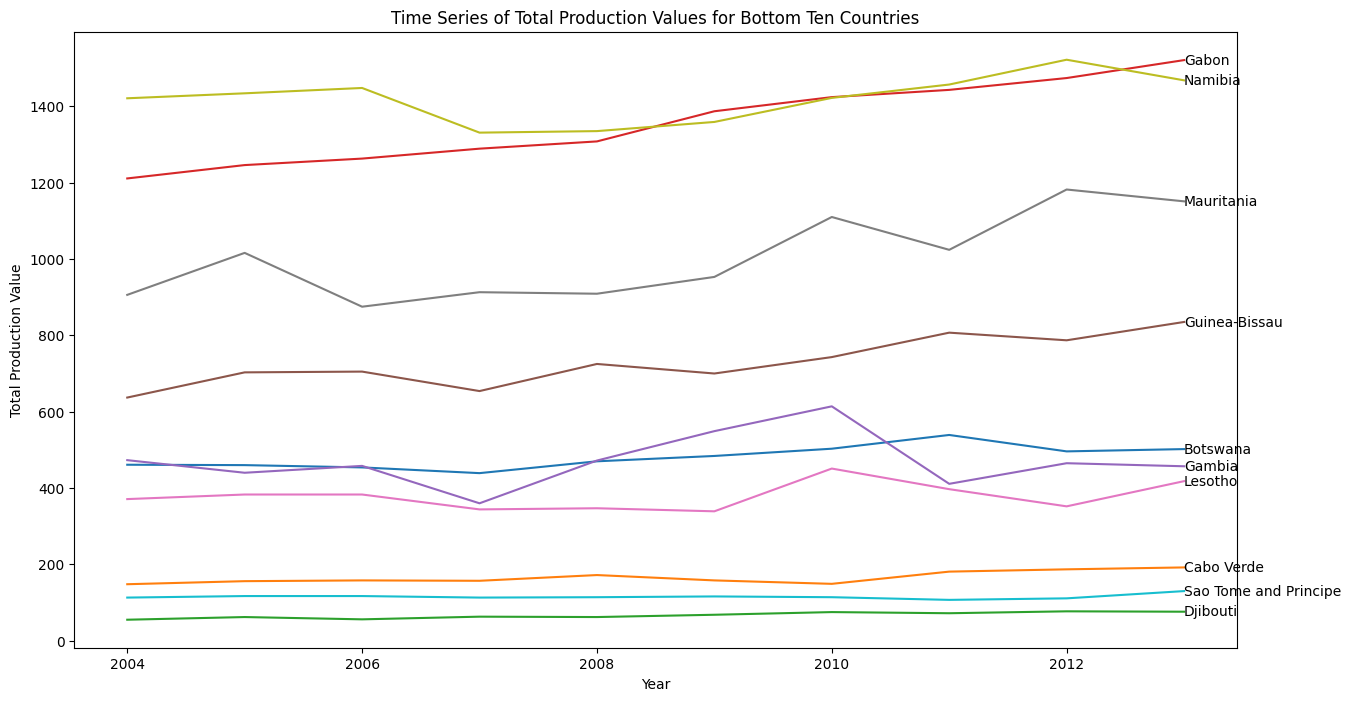

In [ ]:
# Select the bottom ten countries based on total production values
bottom_countries = grouped_food_prod.groupby('Country')['Total_value'].sum().nsmallest(10).index

# Filter the DataFrame for the bottom ten countries
bottom_countries_data = grouped_food_prod[grouped_food_prod['Country'].isin(bottom_countries)]

# Line plot for total production values over time for the bottom ten countries
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x='Year', y='Total_value', hue='Country', data=bottom_countries_data, markers=True, dashes=False, legend=False)

# Label each line directly on the plot
for country in bottom_countries:
    subset = bottom_countries_data[bottom_countries_data['Country'] == country]
    last_data_point = subset.iloc[-1]
    ax.text(last_data_point['Year'], last_data_point['Total_value'], country, ha='left', va='center')

plt.title('Time Series of Total Production Values for Bottom Ten Countries')
plt.xlabel('Year')
plt.ylabel('Total Production Value')
plt.show()

# **Exploratory Data Analysis on Food Supply**

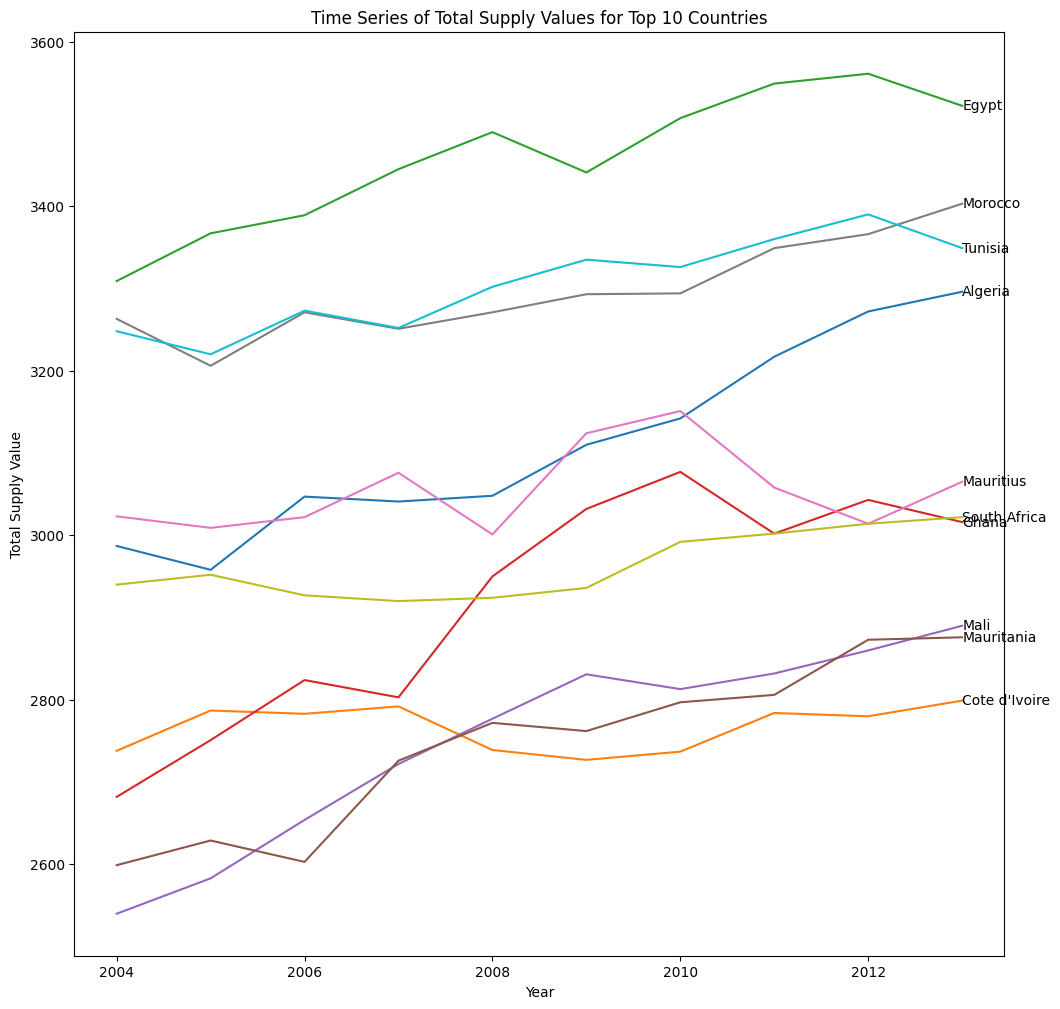

In [ ]:
# Select the top 10 countries based on total supply values
top_countries_supply = food_supply.groupby('Country')['Value'].sum().nlargest(10).index

# Filter the DataFrame for the top 10 countries
top_countries_supply_data = food_supply[food_supply['Country'].isin(top_countries_supply)]

# Line plot for total supply values over time for the top 10 countries
plt.figure(figsize=(12, 12))
ax = sns.lineplot(x='Year', y='Value', hue='Country', data=top_countries_supply_data, markers=True, dashes=False, legend=False)

# Label each line directly on the plot
for country in top_countries_supply:
    subset = top_countries_supply_data[top_countries_supply_data['Country'] == country]
    last_data_point = subset.iloc[-1]
    ax.text(last_data_point['Year'], last_data_point['Value'], country, ha='left', va='center')

plt.title('Time Series of Total Supply Values for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Total Supply Value')
plt.show()

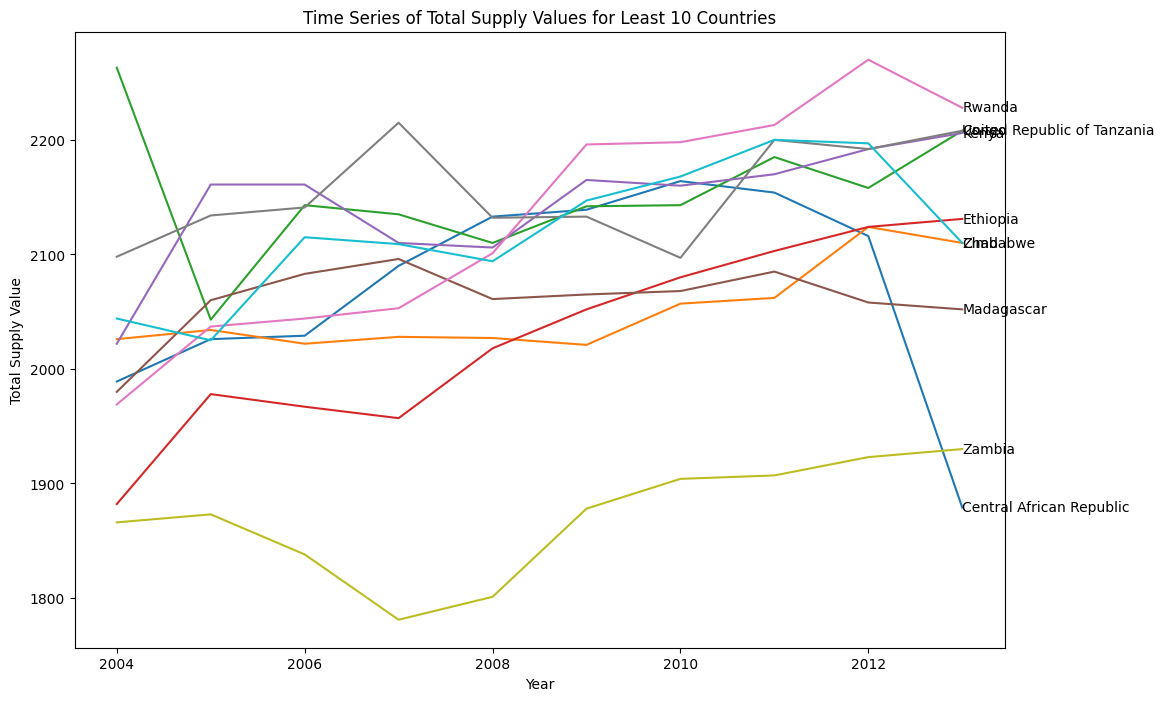

In [ ]:
# Select the least 10 countries based on total supply values
least_countries_supply = food_supply.groupby('Country')['Value'].sum().nsmallest(10).index

# Filter the DataFrame for the least 10 countries
least_countries_supply_data = food_supply[food_supply['Country'].isin(least_countries_supply)]

# Line plot for total supply values over time for the least 10 countries
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='Year', y='Value', hue='Country', data=least_countries_supply_data, markers=True, dashes=False, legend=False)

# Label each line directly on the plot
for country in least_countries_supply:
    subset = least_countries_supply_data[least_countries_supply_data['Country'] == country]
    last_data_point = subset.iloc[-1]
    ax.text(last_data_point['Year'], last_data_point['Value'], country, ha='left', va='center')

plt.title('Time Series of Total Supply Values for Least 10 Countries')
plt.xlabel('Year')
plt.ylabel('Total Supply Value')
plt.show()

**Visualizing the the top 20 items produced diffrent over the years**

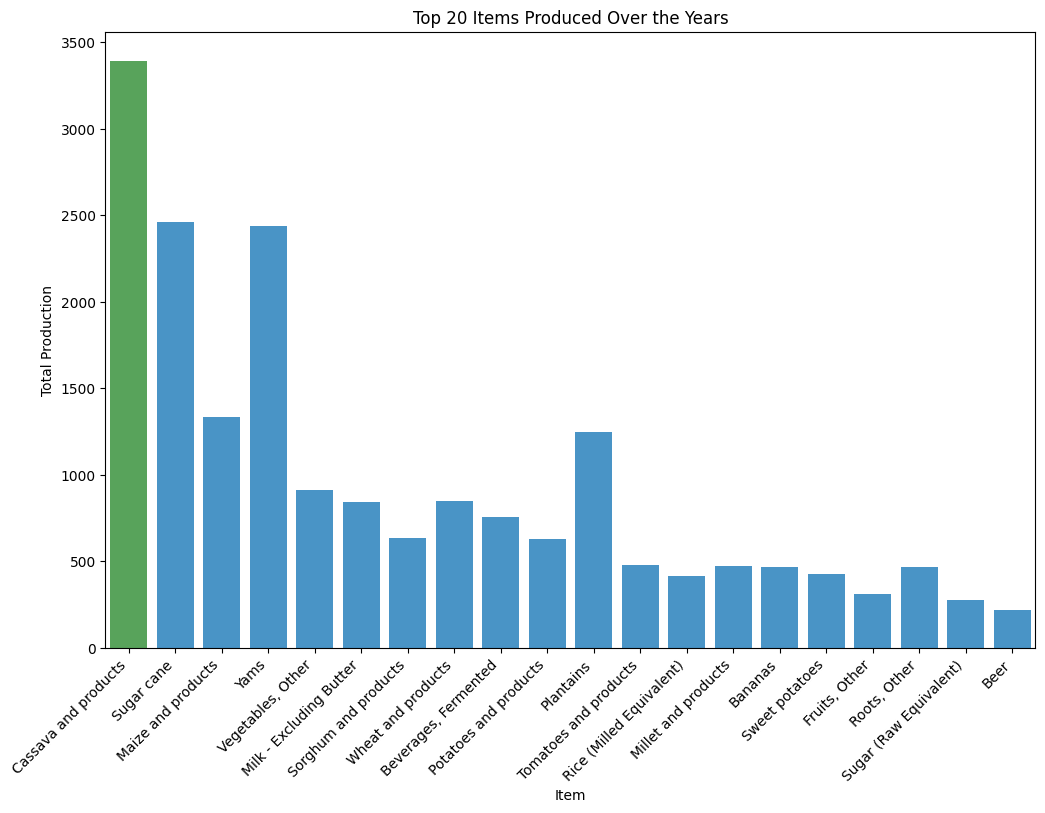

In [ ]:
# Identify the top 20 items produced over the years
top_items = food_prod.groupby('Item')['Value'].sum().nlargest(20).index

# Filter the DataFrame for the top 20 items
top_items_data = food_prod[food_prod['Item'].isin(top_items)]

# Order the items by total production from highest to least
order = top_items_data.groupby('Item')['Value'].sum().sort_values(ascending=False).index

# Bar plot for the total production of the top 20 items over the years
plt.figure(figsize=(12, 8))
sns.barplot(x='Item', y='Value', data=top_items_data, order=order, palette=['#3498db' if i != top_items[0] else '#4CAF50' for i in order], errorbar=None)
plt.title('Top 20 Items Produced Over the Years')
plt.xlabel('Item')
plt.ylabel('Total Production')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Identify the countries that produced the top 20 items
top_items_countries = top_items_data.groupby(['Item', 'Country'])['Value'].sum().reset_index()

top_items_countries

,Item,Country,Value
0,Bananas,Algeria,0
1,Bananas,Angola,18746
2,Bananas,Benin,157
3,Bananas,Cabo Verde,78
4,Bananas,Cameroon,11823
...,...,...,...
689,Yams,Rwanda,238
690,Yams,Sao Tome and Principe,20
691,Yams,Sudan,1502
692,Yams,Togo,6775


In [ ]:
# Find the country with the highest production for each item
max_producer_per_item = top_items_countries.loc[top_items_countries.groupby('Item')['Value'].idxmax()].sort_values(by='Value', ascending=False)

In [ ]:
# Select the relevant columns and rename them
high_prod_countries = max_producer_per_item[['Item', 'Country', 'Value']].rename(columns={'Country': 'Country with Highest Production', 'Value': 'Total Production'})

# Display the table
high_prod_countries

,Item,Country with Highest Production,Total Production
127,Cassava and products,Nigeria,452881
688,Yams,Nigeria,349519
524,Sugar cane,South Africa,188396
218,Maize and products,South Africa,107343
93,"Beverages, Fermented",Nigeria,93839
574,Tomatoes and products,Egypt,85505
613,"Vegetables, Other",Egypt,85271
651,Wheat and products,Egypt,81311
446,Sorghum and products,Nigeria,78915
263,Milk - Excluding Butter,Sudan,70527


In [ ]:
# Identify the country that appears most
most_common_country = max_producer_per_item['Country'].mode().iloc[0]
most_common_country

'Nigeria'

**Visualizing the Trend in Average Production and Supply Over Years**

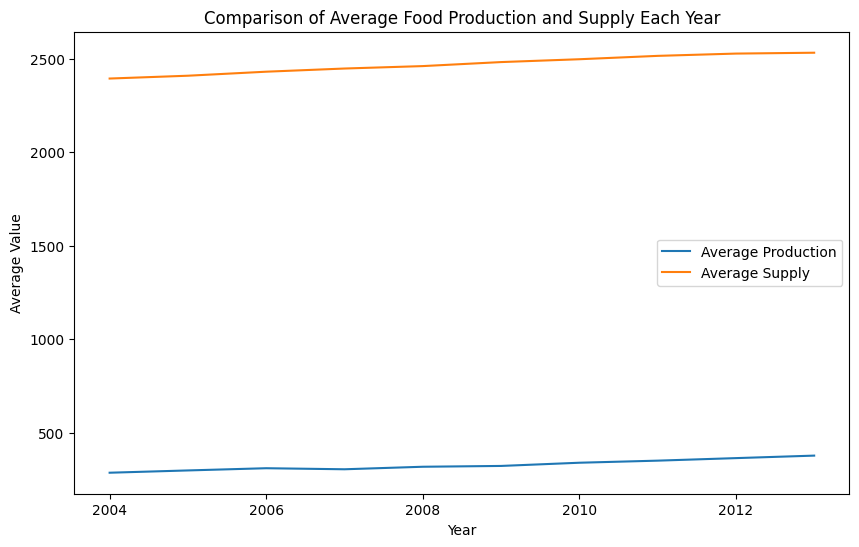

In [ ]:
# Calculate the average production and supply for each year
average_production = food_prod.groupby('Year')['Value'].mean().reset_index()
average_supply = food_supply.groupby('Year')['Value'].mean().reset_index()

# Merge the two averages into a new DataFrame
average_data = pd.merge(average_production, average_supply, left_on='Year', right_on='Year', suffixes=('_Production', '_Supply'))

# Plot the comparison using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value_Production', data=average_data, label='Average Production')
sns.lineplot(x='Year', y='Value_Supply', data=average_data, label='Average Supply')
plt.title('Comparison of Average Food Production and Supply Each Year')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.show()

In [ ]:
average_data

,Year,Value_Production,Value_Supply
0,2004,286.767301,2394.222222
1,2005,298.986592,2409.288889
2,2006,310.814014,2430.800000
3,2007,305.215830,2447.755556
4,2008,318.686851,2460.755556
5,2009,323.040657,2482.222222
6,2010,340.166955,2497.400000
7,2011,351.303633,2515.422222
8,2012,364.831816,2527.644444
9,2013,378.227568,2532.244444


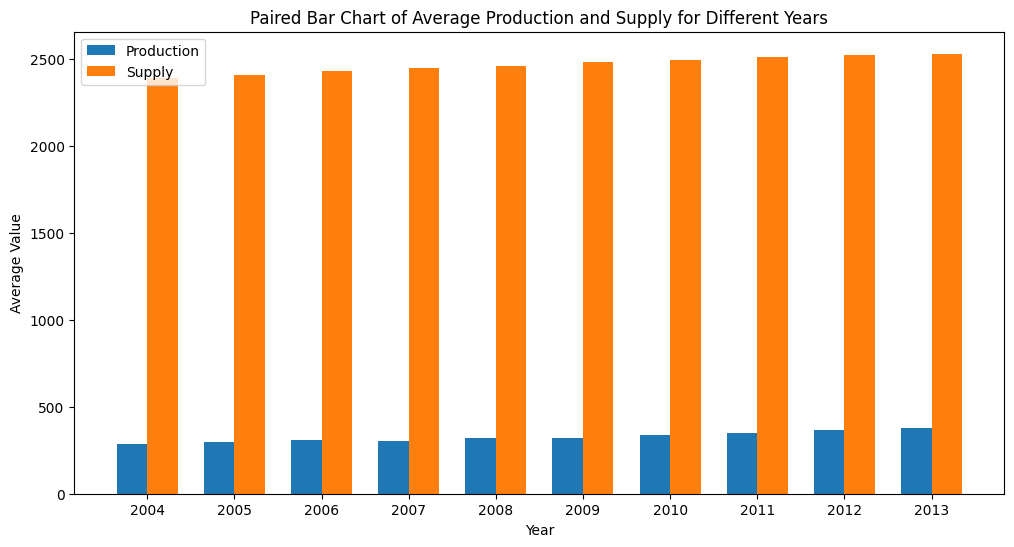

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Define the width of the bars
bar_width = 0.35

# Set the positions for the bars
years = average_data['Year'].unique()
production_positions = np.arange(len(years))
supply_positions = production_positions + bar_width

# Plot the bars for 'Value_Production'
plt.bar(production_positions, average_data.groupby('Year')['Value_Production'].mean(), width=bar_width, label='Production')

# Plot the bars for 'Value_Supply'
plt.bar(supply_positions, average_data.groupby('Year')['Value_Supply'].mean(), width=bar_width, label='Supply')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Paired Bar Chart of Average Production and Supply for Different Years')
plt.xticks(production_positions + bar_width / 2, years)
plt.legend()

# Show the plot
plt.show()

# **Hypothesis Testing**

Rice is a commonly grown and consumed crop in most countries. I explored population and rice production values if the size of a population relates to how much rice a country grows.

In [ ]:
#Importing Population Dataset
population = pd.read_csv('/content/Population_data.csv.csv')

# Display the first few rows of the DataFrame
population

,Country Name,Country Code,Indicator Name,Indicator Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Population, total",SP.POP.TOTL,93540.0,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0,102112.0,102880.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,445281555.0,457153837.0,469508516.0,482406426.0,495748900.0,509410477.0,523459657.0,537792950.0,552530654.0,567892149.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,23553551.0,24411191.0,25442944.0,25903301.0,26427199.0,27385307.0,28189672.0,29249157.0,30466479.0,31541209.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,301265247.0,309824829.0,318601484.0,327612838.0,336893835.0,346475221.0,356337762.0,366489204.0,376797999.0,387204553.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,18771125.0,19450959.0,20162340.0,20909684.0,21691522.0,22507674.0,23364185.0,24259111.0,25188292.0,26147002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,20733406.0,21320671.0,21966298.0,22641538.0,23329004.0,24029589.0,24743946.0,25475610.0,26223391.0,26984002.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,48556071.0,49017147.0,49491756.0,49996094.0,50565812.0,51170779.0,51784921.0,52443325.0,53145033.0,53873616.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,11188040.0,11564870.0,11971567.0,12402073.0,12852966.0,13318087.0,13792086.0,14265814.0,14744658.0,15234976.0


In [ ]:
population.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
dtype: object

In [ ]:
# Drop unnecessary columns from the population DataFrame
population = population.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)


In [ ]:
# Reshape the population DataFrame to long format
population_long = population.melt(id_vars='Country Name', var_name='Year', value_name='Population')

# Convert 'year' to numeric
population_long['Year'] = pd.to_numeric(population_long['Year'])
population_long

,Country Name,Year,Population
0,Aruba,2004,93540.0
1,Africa Eastern and Southern,2004,445281555.0
2,Afghanistan,2004,23553551.0
3,Africa Western and Central,2004,301265247.0
4,Angola,2004,18771125.0
...,...,...,...
2655,Kosovo,2013,1818117.0
2656,"Yemen, Rep.",2013,26984002.0
2657,South Africa,2013,53873616.0
2658,Zambia,2013,15234976.0


In [ ]:
# Filter Food Production Data for Rice Production
rice_production = food_prod[(food_prod['Item'] == 'Rice (Milled Equivalent)') & (food_prod['Country'].isin(population_long['Country Name']))]
rice_production

,Country,Item,Year,Value
10,Algeria,Rice (Milled Equivalent),2004,0
11,Algeria,Rice (Milled Equivalent),2005,0
12,Algeria,Rice (Milled Equivalent),2006,0
13,Algeria,Rice (Milled Equivalent),2007,0
14,Algeria,Rice (Milled Equivalent),2008,0
...,...,...,...,...
22485,Zimbabwe,Rice (Milled Equivalent),2009,0
22486,Zimbabwe,Rice (Milled Equivalent),2010,0
22487,Zimbabwe,Rice (Milled Equivalent),2011,0
22488,Zimbabwe,Rice (Milled Equivalent),2012,0


In [ ]:
# Drop rows where rice production is 0
rice_production = rice_production.loc[rice_production['Value'] != 0]

# Print the DataFrame after dropping rows
rice_production

,Country,Item,Year,Value
590,Angola,Rice (Milled Equivalent),2004,9
591,Angola,Rice (Milled Equivalent),2005,6
592,Angola,Rice (Milled Equivalent),2006,3
593,Angola,Rice (Milled Equivalent),2007,3
594,Angola,Rice (Milled Equivalent),2008,6
...,...,...,...,...
22006,Zambia,Rice (Milled Equivalent),2010,34
22007,Zambia,Rice (Milled Equivalent),2011,33
22008,Zambia,Rice (Milled Equivalent),2012,30
22009,Zambia,Rice (Milled Equivalent),2013,30


In [ ]:
# Merge rice production and population DataFrames
merged_data = pd.merge(rice_production, population_long, left_on=['Year', 'Country'], right_on=['Year', 'Country Name'], how = 'inner')
merged_data

,Country,Item,Year,Value,Country Name,Population
0,Angola,Rice (Milled Equivalent),2004,9,Angola,18771125.0
1,Angola,Rice (Milled Equivalent),2005,6,Angola,19450959.0
2,Angola,Rice (Milled Equivalent),2006,3,Angola,20162340.0
3,Angola,Rice (Milled Equivalent),2007,3,Angola,20909684.0
4,Angola,Rice (Milled Equivalent),2008,6,Angola,21691522.0
...,...,...,...,...,...,...
297,Zambia,Rice (Milled Equivalent),2010,34,Zambia,13792086.0
298,Zambia,Rice (Milled Equivalent),2011,33,Zambia,14265814.0
299,Zambia,Rice (Milled Equivalent),2012,30,Zambia,14744658.0
300,Zambia,Rice (Milled Equivalent),2013,30,Zambia,15234976.0


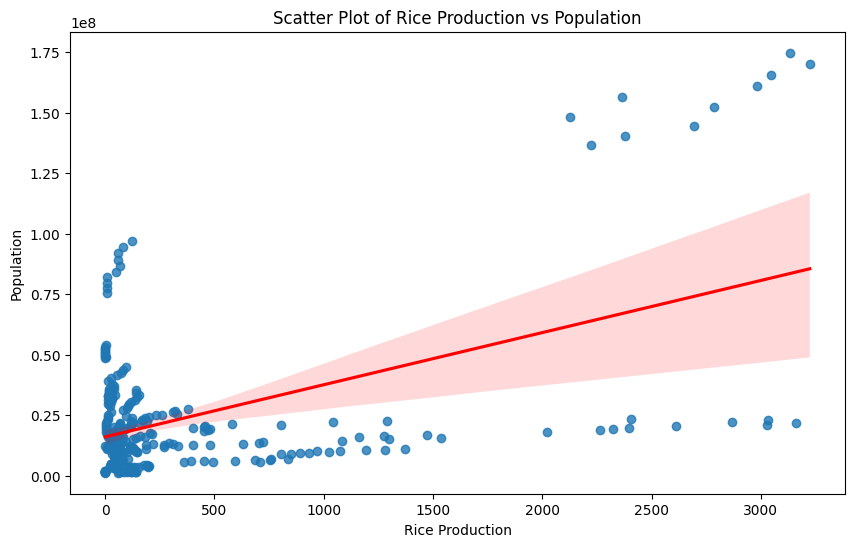

In [ ]:
# Scatter plot of Plot of Rice Production vs Population with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Value', y='Population', data=merged_data, line_kws={'color': 'red'})
plt.title('Scatter Plot of Rice Production vs Population')
plt.xlabel('Rice Production')
plt.ylabel('Population')
plt.show()

In [ ]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(merged_data['Population'], merged_data['Value'])

# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.4966066201863002
P-value: 3.273341889532966e-20


In [ ]:
# Perform hypothesis test
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")

Reject the null hypothesis. There is evidence of a significant correlation.


My data exploration set out to answer a straightforward question: Does the size of a population relate to how much rice a country grows?

The null hypothesis set the backdrop for our exploration, postulating a scenario where rice production and population were independent entities.  The p-value, a powerful indicator, stood at 3.27e-20, providing compelling evidence against the idea that rice production and population are unrelated.

Picture a garden and the number of people enjoying its harvest. It turns out, as the community grows, so does the abundance of rice. It's not just a random connection.

The findings tell a clear story: when more people live in certain African countries, more rice is also produced.

 The rejection of the null hypothesis suggests that as rice production increases, so does the population in the chosen African countries.

**Relationship Between Population and Food Supply**

In [ ]:
# Merge population_long and food_supply on 'Country' and 'Year'
merged_supply_pop = pd.merge(food_supply, population_long, left_on=['Year', 'Country'], right_on=['Year', 'Country Name'], how = 'inner')
merged_supply_pop

,Country,Year,Value,Country Name,Population
0,Algeria,2004,2987,Algeria,32510186.0
1,Algeria,2005,2958,Algeria,32956690.0
2,Algeria,2006,3047,Algeria,33435080.0
3,Algeria,2007,3041,Algeria,33983827.0
4,Algeria,2008,3048,Algeria,34569592.0
...,...,...,...,...,...
395,Zimbabwe,2009,2147,Zimbabwe,12679810.0
396,Zimbabwe,2010,2168,Zimbabwe,12839771.0
397,Zimbabwe,2011,2200,Zimbabwe,13025785.0
398,Zimbabwe,2012,2197,Zimbabwe,13265331.0


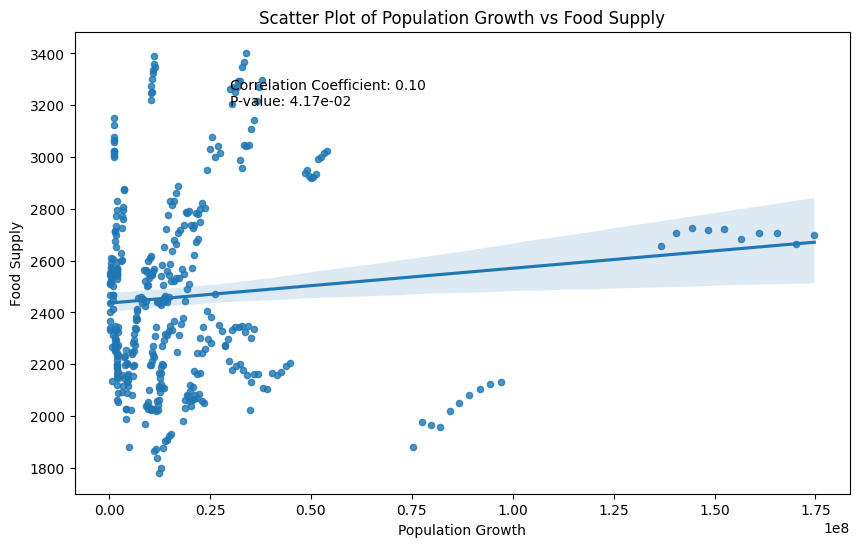

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Population', y='Value', data=merged_supply_pop, scatter_kws={'s': 20})
plt.title('Scatter Plot of Population Growth vs Food Supply')
plt.xlabel('Population Growth')
plt.ylabel('Food Supply')

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(merged_supply_pop['Population'], merged_supply_pop['Value'])

# Add correlation coefficient and p-value to the plot
plt.text(0.2, 0.9, f'Correlation Coefficient: {correlation:.2f}\nP-value: {p_value:.2e}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show()

# **Global Hunger Index**

In [ ]:
# Load the Global Hunger Index dataset
ghi_dataset_url = "/content/Global Hunger Index 2004 - 2013 - Sheet1 (1).csv"
ghi_data = pd.read_csv(ghi_dataset_url)

In [ ]:
ghi_data

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,45.80,44.15,42.50,40.85,39.2,38.65,38.10,37.55,37.00,36.45
1,Albania,19.00,18.48,17.95,17.43,16.9,16.28,15.65,15.03,14.40,13.78
2,Algeria,12.80,12.30,11.80,11.30,10.8,10.54,10.28,10.01,9.75,9.49
3,Angola,49.15,46.99,44.83,42.66,40.5,39.54,38.58,37.61,36.65,35.69
4,Argentina,5.15,5.11,5.08,5.04,5.0,5.00,5.00,5.00,5.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...
111,Venezuela,12.00,11.18,10.35,9.53,8.7,8.49,8.28,8.06,7.85,7.64
112,Vietnam,26.15,25.14,24.13,23.11,22.1,21.15,20.20,19.25,18.30,17.35
113,Yemen,39.85,39.01,38.18,37.34,36.5,36.31,36.13,35.94,35.75,35.56
114,Zambia,47.80,47.15,46.50,45.85,45.2,44.43,43.65,42.88,42.10,41.33


In [ ]:
# Reshape the GHI dataset using pd.melt
melted_ghi_data = pd.melt(ghi_data, id_vars=['Country'], var_name='Year', value_name='Global_Hunger_Index')

In [ ]:
# Convert 'Year' to numeric
melted_ghi_data['Year'] = pd.to_numeric(melted_ghi_data['Year'], errors='coerce')

In [ ]:
melted_ghi_data.dtypes

Country                 object
Year                     int64
Global_Hunger_Index    float64
dtype: object

In [ ]:
# Convert 'Year' to datetime format
melted_ghi_data['Year'] = pd.to_datetime(melted_ghi_data['Year'], format='%Y')

# Convert 'Global_Hunger_Index' to numeric
melted_ghi_data['Global_Hunger_Index'] = pd.to_numeric(melted_ghi_data['Global_Hunger_Index'], errors='coerce')


In [ ]:
melted_ghi_data.dtypes

Country                        object
Year                   datetime64[ns]
Global_Hunger_Index           float64
dtype: object

In [ ]:
# Sum the 'Value' column for each year and each country
summed_food_prod = food_prod.groupby(['Country', 'Year'])['Value'].sum().reset_index()
summed_food_prod

,Country,Year,Value
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841
...,...,...,...
445,Zimbabwe,2009,5754
446,Zimbabwe,2010,6777
447,Zimbabwe,2011,7551
448,Zimbabwe,2012,8173


In [ ]:
# Merge the summed food production dataset with the melted GHI dataset on 'Country' and 'Year'
melted_ghi_data['Year'] = melted_ghi_data['Year'].dt.year.astype(int)

# Merge the summed food production dataset with the melted GHI dataset on 'Country' and 'Year'
merged_prod_ghi = pd.merge(summed_food_prod, melted_ghi_data, on=['Country', 'Year'], how='inner')

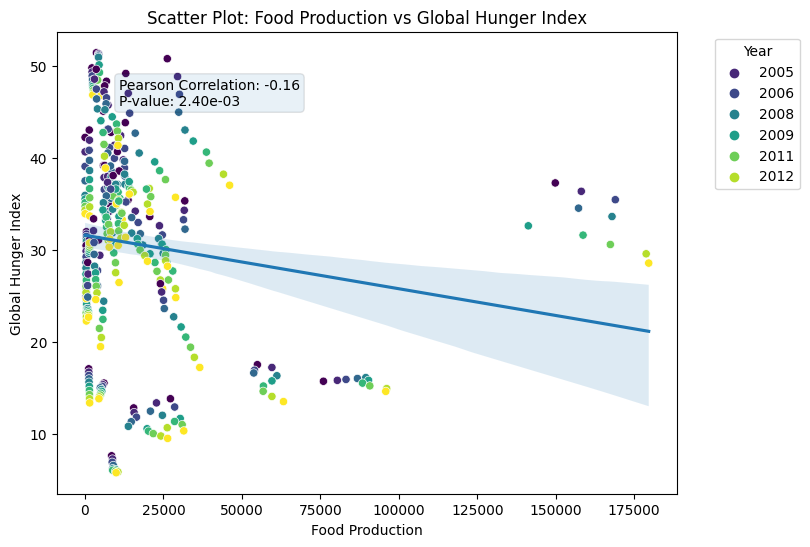

In [ ]:
# Scatter plot between GHI and food production for a specific year with trendline
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(x='Value', y='Global_Hunger_Index', data=merged_prod_ghi, hue='Year', palette='viridis')
sns.regplot(x='Value', y='Global_Hunger_Index', data=merged_prod_ghi, scatter=False, ax=scatter_plot)
plt.title('Scatter Plot: Food Production vs Global Hunger Index')
plt.xlabel('Food Production')
plt.ylabel('Global Hunger Index')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Calculate and display the Pearson correlation and p-value
correlation_coefficient, p_value = pearsonr(merged_prod_ghi['Value'], merged_prod_ghi['Global_Hunger_Index'])
correlation_text = f"Pearson Correlation: {correlation_coefficient:.2f}\nP-value: {p_value:.2e}"
plt.text(0.1, 0.9, correlation_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))

plt.show()


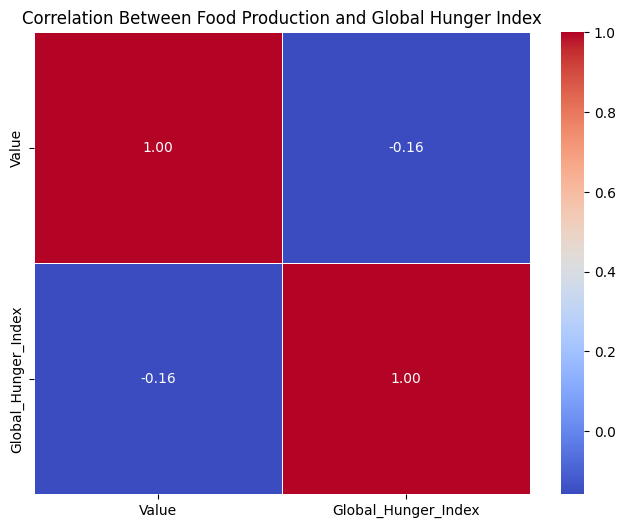

In [ ]:
# Explore the correlation between food production and Global Hunger Index
correlation_matrix = merged_prod_ghi[['Value', 'Global_Hunger_Index']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Between Food Production and Global Hunger Index')
plt.show()

**Visualize the relationship between Severity Gobal Hunger Index and Food Production**

In [ ]:
# Define the bins and labels for severity scale
bins = [-float('inf'), 9.9, 19.9, 34.9, 49.9, float('inf')]
labels = ['Low', 'Moderate', 'Serious', 'Alarming', 'Extremely Alarming']

# Create a new column 'GHI_Severity' based on the severity scale
merged_prod_ghi['GHI_Severity'] = pd.cut(merged_prod_ghi['Global_Hunger_Index'], bins=bins, labels=labels, right=False)

# Display the updated dataset with the new 'GHI_Severity' column
print("Updated Dataset with GHI Severity:")
print(merged_prod_ghi)

In [ ]:
# Filter rows for the year 2012
filtered_data_2012 = merged_prod_ghi[merged_prod_ghi['Year'] == 2012]
filtered_data_2012.head(10)

,Country,Year,Value,Global_Hunger_Index,GHI_Severity
8,Algeria,2012,24206,9.75,Low
18,Angola,2012,20505,36.65,Alarming
28,Benin,2012,9797,27.50,Serious
38,Botswana,2012,496,26.95,Serious
48,Burkina Faso,2012,11634,34.05,Serious
58,Cameroon,2012,24044,26.70,Serious
68,Central African Republic,2012,2761,47.05,Alarming
78,Chad,2012,5688,47.60,Alarming
88,Djibouti,2012,77,34.30,Serious
98,Egypt,2012,96139,14.90,Moderate


In [ ]:
# Sort the dataset by 'Global_Hunger_Index'
sorted_ghi_2012 =filtered_data_2012.sort_values(by='Global_Hunger_Index', ascending=True)
sorted_ghi_2012 .head(10)

,Country,Year,Value,Global_Hunger_Index,GHI_Severity
338,Tunisia,2012,10509,5.85,Low
8,Algeria,2012,24206,9.75,Low
238,Morocco,2012,26236,10.65,Moderate
118,Gabon,2012,1474,13.80,Moderate
228,Mauritius,2012,4610,14.00,Moderate
318,South Africa,2012,59581,14.05,Moderate
98,Egypt,2012,96139,14.90,Moderate
138,Ghana,2012,34860,18.30,Moderate
298,Senegal,2012,5237,20.45,Serious
128,Gambia,2012,465,22.70,Serious


In [ ]:
# Sort the dataset by 'Value'
sorted_value_2012 =filtered_data_2012.sort_values(by='Value', ascending=False)
sorted_value_2012 .head(20)

,Country,Year,Value,Global_Hunger_Index,GHI_Severity
278,Nigeria,2012,178816,29.55,Serious
98,Egypt,2012,96139,14.90,Moderate
318,South Africa,2012,59581,14.05,Moderate
108,Ethiopia,2012,44142,38.20,Alarming
138,Ghana,2012,34860,18.30,Moderate
158,Kenya,2012,28851,25.75,Serious
238,Morocco,2012,26236,10.65,Moderate
348,Uganda,2012,25711,28.80,Serious
8,Algeria,2012,24206,9.75,Low
58,Cameroon,2012,24044,26.70,Serious


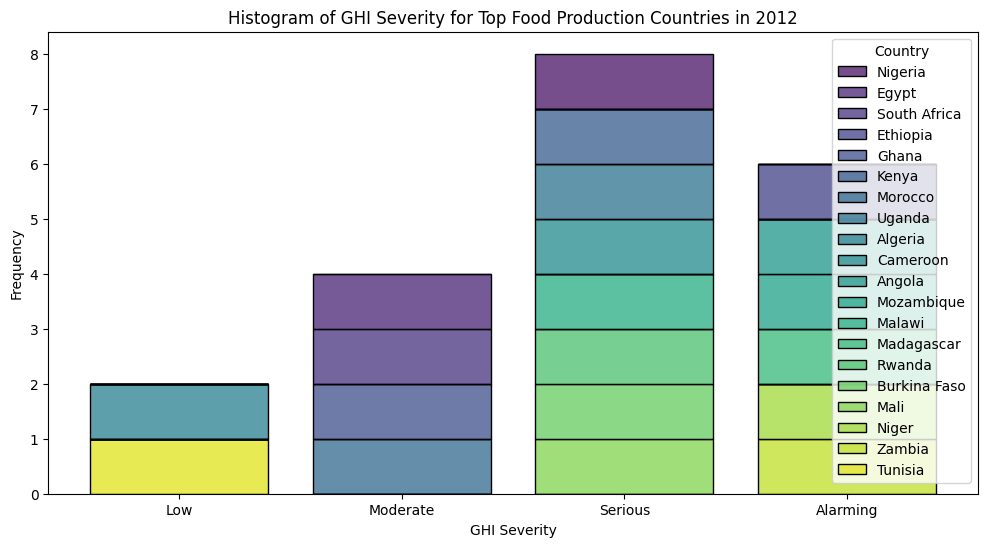

In [ ]:
# Get the top 20 countries with high 'Value'
top_countries = sorted_value_2012.nlargest(20, 'Value')['Country']

# Filter the dataset for the top countries
top_countries_data = sorted_value_2012[sorted_value_2012['Country'].isin(top_countries)]

# Reset the index
top_countries_data = top_countries_data.reset_index(drop=True)

# Plot histogram for 'GHI_Severity' for the top countries
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=top_countries_data, x='GHI_Severity', hue='Country', multiple='stack', palette='viridis', shrink=0.8)

# Add labels and title
plt.title('Histogram of GHI Severity for Top Food Production Countries in 2012')
plt.xlabel('GHI Severity')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:
# Merge the food supply dataset with the sorted_value_2012 data on 'Country' and 'Year'
merged_supply_ghi = pd.merge(food_supply, sorted_value_2012, on=['Country', 'Year'], how='inner')

# Rename the Value column to distinguish between food supply and production values
merged_supply_ghi = merged_supply_ghi.rename(columns={'Value_y': 'Value_supply', 'Value_x': 'Value_prod'})
merged_supply_ghi

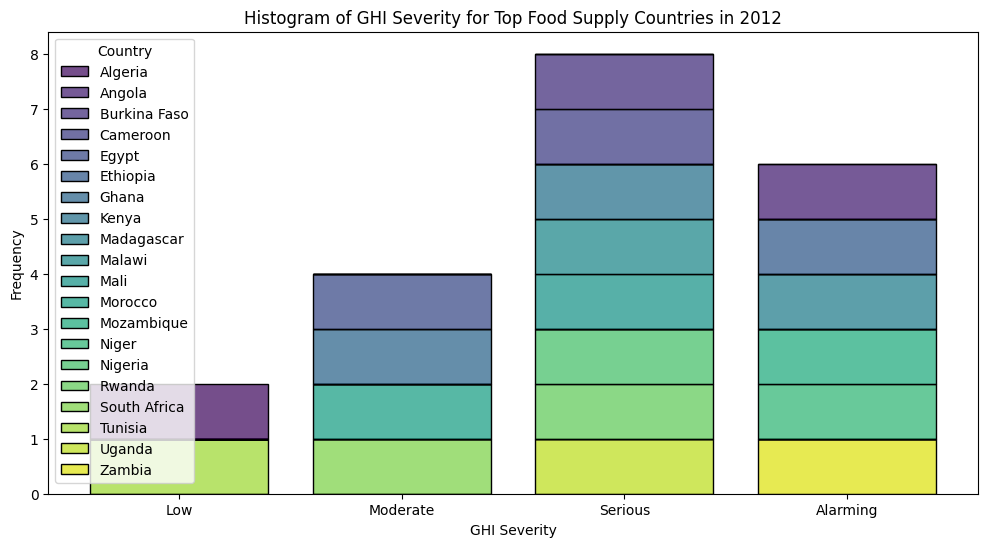

In [ ]:
# Get the top 20 countries with high 'Value'
top_countries_sup = merged_supply_ghi.nlargest(20, 'Value_supply')['Country']

# Filter the dataset for the top countries
top_countries_data_sup = merged_supply_ghi[merged_supply_ghi['Country'].isin(top_countries)]

# Reset the index
top_countries_data_sup = top_countries_data_sup.reset_index(drop=True)

# Plot histogram for 'GHI_Severity' for the top countries
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=top_countries_data_sup, x='GHI_Severity', hue='Country', multiple='stack', palette='viridis', shrink=0.8)

# Add labels and title
plt.title('Histogram of GHI Severity for Top Food Supply Countries in 2012')
plt.xlabel('GHI Severity')
plt.ylabel('Frequency')

# Show the plot
plt.show()